## Connect to CDF

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from cognite.client.data_classes import TimeSeries, Sequence

In [4]:
module_path = os.path.abspath(os.path.join("../utils"))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/kevin.peng/code/cognite/Drilling-rate-of-penetration-prediction/utils


In [5]:
from pathlib import Path
from dotenv import load_dotenv
dotenv_path = Path("../utils/.env")
load_dotenv(dotenv_path=dotenv_path)
CLIENT_SECRET = os.getenv("CLIENT_SECRET")  # store secret in .env file
print("CLIENT_SECRET")
print(CLIENT_SECRET)

CLIENT_SECRET
b2kwbWhqI09ZeiFVeURzWQ==


In [6]:
import auth as cauth
c = cauth.create_cognite_client('client-secret')

CLIENT_SECRET
b2kwbWhqI09ZeiFVeURzWQ==


In [7]:
c.login.status()

/var/folders/73/r__fy3qd5fqf46_jrr1pmhm80000gn/T/ipykernel_56001/2034473358.py:1: UserWarning: It seems you are trying to reach API endpoint `/login/status` which is only valid when authenticating using an API key - without an API key. Try `client.iam.token.inspect` instead
  c.login.status()


{
    "user": "31c71712-7dad-45dd-936b-871bd198c63c",
    "project": "",
    "project_id": -1,
    "logged_in": true
}

In [8]:
c.iam.token.inspect()

{
    "subject": "31c71712-7dad-45dd-936b-871bd198c63c",
    "projects": [
        {
            "url_name": "accenture-tiger-training",
            "groups": [
                6667959924029947,
                6728852653352921,
                8377567822879967
            ]
        }
    ],
    "capabilities": [
        {
            "projectsAcl": {
                "actions": [
                    "LIST"
                ],
                "scope": {
                    "all": {}
                }
            },
            "projectScope": {
                "projects": [
                    "accenture-tiger-training"
                ]
            }
        },
        {
            "groupsAcl": {
                "actions": [
                    "LIST"
                ],
                "scope": {
                    "all": {}
                }
            },
            "projectScope": {
                "projects": [
                    "accenture-tiger-training"
                ]
    

In [9]:
c.assets.list(limit=5)

,external_id,name,parent_id,parent_external_id,data_set_id,metadata,id,created_time,last_updated_time,root_id,description
0,IH-HGZGV S-157-90-1609S-3,IH-HGZGV S-157-90-1609S-3,2551226079268162,IH_NRHHRMT RMUL,6870218523598358,"{'BatchName': 'RS-StateH-5well', 'CompressorSt...",183065687133,1676479449540,1676479449540,2067802722071209,NaN
1,IH-Q MVOHLM-156-91-0708S-11,IH-Q MVOHLM-156-91-0708S-11,2537153653517614,Ivw Hpb Dvhg_IH-Q MVOHLM-156-91-0708_IH-Q Mvoh...,6870218523598358,"{'BatchName': 'RS-JNelson489-9well-Batch2', 'C...",470019460876,1676481066793,1676481066793,2067802722071209,NaN
2,NaN,British Indian Ocean Territory,4463201995120415,NaN,2319166374491274,{},4625150735390,1675366345460,1675366345460,5363137950882566,NaN
3,WMT:23-XE-96125,23-XE-96125,7291613823883457,WMT:23-DB-9101,<NA>,"{'ELC_STATUS_ID': '1211', 'RES_ID': '300990', ...",5218984646498,1676642193884,1676642193884,1962284212368823,VRD - PH 1STSTGGEARSHAFT2JOURNBRGNDE
4,WMT:23-LAL-96182-01,23-LAL-96182-01,2610909613455397,WMT:23-LT-96182-01,<NA>,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",8434084932582,1676642240811,1676642240811,1962284212368823,VRD - PH 1STSTG COMP LO RES : LEVEL ALARM LOW


In [10]:
#### IMPORT DATA
data = pd.read_csv('../data/Well_58-32.csv', na_values='na')

In [11]:
data.shape

(7311, 27)

In [12]:
data.columns.tolist()[:10]

['Depth(ft)',
 'Depth(m)',
 'ROP(1 ft)',
 'ROP(1 m)',
 'weight on bit (k-lbs)',
 'weight on bit (kg)',
 'Temp Out( degF)',
 'Temp Out( degC)',
 'Temp In(degF)',
 'Temp In(degC)']

In [13]:
data.head()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.0,0.0,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.0,0.0,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.0,0.0,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.0,0.0,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.0,0.0,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31


In [14]:
# Check if still missing data
data.isna().sum()

Depth(ft)                0
Depth(m)                 0
ROP(1 ft)                0
ROP(1 m)                 0
weight on bit (k-lbs)    0
weight on bit (kg)       0
Temp Out( degF)          0
Temp Out( degC)          0
Temp In(degF)            0
Temp In(degC)            0
Pit Total (bbls)         0
Pit Total (m3)           0
Pump Press (psi)         0
Pump Press (KPa)         0
Hookload (k-lbs)         0
Hookload (kg)            0
Surface Torque (psi)     0
Surface Torque (KPa)     0
Rotary Speed (rpm)       0
Flow In (gal/min)        0
Flow In(liters/min)      0
Flow Out %               0
WH Pressure (psi)        0
WH Pressure (KPa)        0
H2S Floor                0
H2S Cellar               0
H2S Pits                 0
dtype: int64

In [15]:
cols = data.columns
cols

Index(['Depth(ft)', 'Depth(m)', 'ROP(1 ft)', 'ROP(1 m)',
       'weight on bit (k-lbs)', 'weight on bit (kg)', 'Temp Out( degF)',
       'Temp Out( degC)', 'Temp In(degF)', 'Temp In(degC)', 'Pit Total (bbls)',
       'Pit Total (m3)', 'Pump Press (psi)', 'Pump Press (KPa)',
       'Hookload (k-lbs)', 'Hookload (kg)', 'Surface Torque (psi)',
       'Surface Torque (KPa)', 'Rotary Speed (rpm)', 'Flow In (gal/min)',
       'Flow In(liters/min)', 'Flow Out %', 'WH Pressure (psi)',
       'WH Pressure (KPa)', 'H2S Floor', 'H2S Cellar', 'H2S Pits'],
      dtype='object')

## Create asset hierarchy

In [62]:
from cognite.client.data_classes import DataSet
res = c.data_sets.create([DataSet(name="rop_wells",external_id="rop_wells")])
res

CogniteDuplicatedError: Duplicated: [{'externalId': 'rop_wells'}]
The API Failed to process some items.
Successful (2xx): []
Unknown (5xx): []
Failed (4xx): ['rop_wells']

In [63]:
c.data_sets.retrieve(external_id="rop_wells")

,value
external_id,rop_wells
name,rop_wells
write_protected,False
id,7121227008062499
created_time,1676499933747
last_updated_time,1676499933747


In [20]:
dataset_id =c.data_sets.retrieve(external_id="rop_wells").id
dataset_id

7121227008062499

In [21]:
from cognite.client.data_classes import Asset

# Create Root Asset
root_asset = c.assets.create(Asset(name='rop_sensors', external_id='rop_sensors',data_set_id=dataset_id))
root_asset

,value
external_id,rop_sensors
name,rop_sensors
data_set_id,7121227008062499
id,7261761644247505
created_time,1676500051634
last_updated_time,1676500051634
root_id,7261761644247505


In [22]:
root_asset_obj = c.assets.retrieve(id =7261761644247505)
root_asset_obj

,value
external_id,rop_sensors
name,rop_sensors
data_set_id,7121227008062499
id,7261761644247505
created_time,1676500051634
last_updated_time,1676500051634
root_id,7261761644247505


In [23]:
# Create each sensor as a new asset
store = []
for sensor in cols:
    asset=Asset(name=sensor, external_id = sensor+'_ext_id',data_set_id=dataset_id,parent_id=root_asset_obj.id)
    store.append(asset)

c.assets.create(store)

,external_id,name,parent_id,data_set_id,metadata,id,created_time,last_updated_time,root_id
0,Depth(ft)_ext_id,Depth(ft),7261761644247505,7121227008062499,{},1961541969464649,1676500160568,1676500160568,7261761644247505
1,Depth(m)_ext_id,Depth(m),7261761644247505,7121227008062499,{},6648141456088250,1676500160568,1676500160568,7261761644247505
2,ROP(1 ft)_ext_id,ROP(1 ft),7261761644247505,7121227008062499,{},2863572914049113,1676500160568,1676500160568,7261761644247505
3,ROP(1 m)_ext_id,ROP(1 m),7261761644247505,7121227008062499,{},7804082885262710,1676500160568,1676500160568,7261761644247505
4,weight on bit (k-lbs)_ext_id,weight on bit (k-lbs),7261761644247505,7121227008062499,{},3434259271503295,1676500160568,1676500160568,7261761644247505
5,weight on bit (kg)_ext_id,weight on bit (kg),7261761644247505,7121227008062499,{},3896495638287865,1676500160568,1676500160568,7261761644247505
6,Temp Out( degF)_ext_id,Temp Out( degF),7261761644247505,7121227008062499,{},2291414110517049,1676500160568,1676500160568,7261761644247505
7,Temp Out( degC)_ext_id,Temp Out( degC),7261761644247505,7121227008062499,{},4069850158637145,1676500160568,1676500160568,7261761644247505
8,Temp In(degF)_ext_id,Temp In(degF),7261761644247505,7121227008062499,{},1755119257853270,1676500160568,1676500160568,7261761644247505
9,Temp In(degC)_ext_id,Temp In(degC),7261761644247505,7121227008062499,{},673971923086672,1676500160568,1676500160568,7261761644247505


In [229]:
# c.sequences.delete(external_id="well5832_sequence")

In [230]:
col_def = []
for k,v in sensor_to_id.items():
    if k != 'rop_sensors':
     col_def.append({"valueType":"DOUBLE","externalId":f"{k}","description":f"some description for asset {k}->{v}"})

In [231]:
len(col_def)

27

In [243]:
seq = c.sequences.create(Sequence(external_id="well5832_sequence",name="well5832_sequence", columns=col_def,data_set_id=dataset_id ))

In [244]:
seq

,value
id,4332937787082889
name,well5832_sequence
external_id,well5832_sequence
columns,"[{'externalId': 'Temp In(degC)', 'description'..."
created_time,1676572290029
last_updated_time,1676572290029
data_set_id,7121227008062499


## insert datapoints

In [236]:
import copy
df = copy.deepcopy(data)
print(df.shape)
df.head()

(7311, 27)


,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.0,0.0,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.0,0.0,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.0,0.0,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.0,0.0,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.0,0.0,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31


In [16]:
res = c.sequences.retrieve(id=4332937787082889)

In [246]:
column_external_ids = [ r['externalId'] for r in c.sequences.retrieve(id=4332937787082889).columns]

In [17]:
res

,value
id,4332937787082889
name,well5832_sequence
external_id,well5832_sequence
columns,"[{'externalId': 'Temp In(degC)', 'description'..."
created_time,1676572290029
last_updated_time,1676572290029
data_set_id,7121227008062499


In [247]:
df

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.00,0.00,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.00,0.00,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.00,0.00,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.00,0.00,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.00,0.00,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,7532.21,2295.71,10.81,3.29,30.55,13854.88,138.89,59.38,121.22,49.57,...,1049.76,34.91,609.49,2307.17,75.66,5.74,39.58,-0.07,0.02,0.06
7307,7533.22,2296.01,13.51,4.12,30.23,13709.75,138.89,59.38,121.14,49.52,...,1040.52,34.78,615.09,2328.37,76.51,5.74,39.58,-0.07,0.01,0.06
7308,7534.23,2296.32,12.62,3.85,29.95,13582.77,139.08,59.49,121.22,49.57,...,1059.97,34.72,635.76,2406.61,80.00,6.13,42.27,-0.08,0.01,0.07
7309,7535.24,2296.63,14.72,4.49,31.06,14086.17,139.31,59.62,121.33,49.63,...,999.78,36.49,627.15,2374.02,77.92,6.13,42.27,-0.07,0.02,0.07


In [248]:

    
dataList = [] #empty list
for index, row in df.iterrows():
    temp_row=[]
    for col in column_external_ids:
        temp_row.append(row[col])
    dataList.append((index+1, temp_row))
    

In [250]:
c.sequences.data.insert(column_external_ids=column_external_ids, rows=dataList, id=4332937787082889)

In [18]:
df_plot = c.sequences.data.retrieve_dataframe(external_id="well5832_sequence",start=0,end=-1)

<AxesSubplot:xlabel='Rotary Speed (rpm)'>

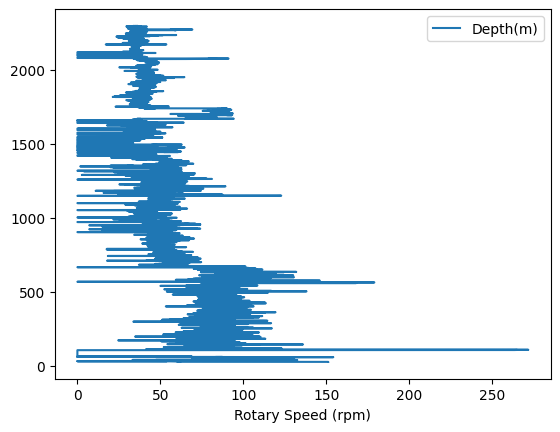

In [19]:
df_plot.plot(y="Depth(m)", x='Rotary Speed (rpm)', )

<AxesSubplot:xlabel='Rotary Speed (rpm)'>

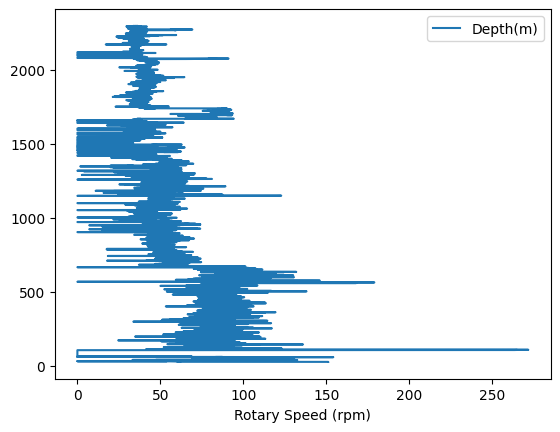

In [253]:
data.plot(y="Depth(m)", x='Rotary Speed (rpm)')

In [254]:
## Write to Parquet file.
df_plot.to_parquet('well5832.parquet.gzip',
              compression='gzip')

In [255]:
pd.read_parquet('well5832.parquet.gzip') 

,Temp In(degC),H2S Pits,Rotary Speed (rpm),Temp In(degF),Depth(ft),Temp Out( degF),Pump Press (psi),H2S Floor,ROP(1 ft),Pump Press (KPa),...,H2S Cellar,Pit Total (bbls),Flow In (gal/min),Flow In(liters/min),Hookload (k-lbs),Depth(m),Pit Total (m3),Surface Torque (KPa),ROP(1 m),Hookload (kg)
index,,,,,,,,,,,,,,,,,,,,,
1,32.71,0.31,151.09,90.87,85.18,93.49,463.72,-0.01,56.80,3197.35,...,-0.03,274.83,1109.58,4200.22,31.77,25.96,43.69,61.57,17.31,14408.16
2,32.68,0.31,151.09,90.83,86.18,93.52,459.53,-0.01,61.14,3168.46,...,-0.04,274.83,1108.36,4195.60,31.01,26.27,43.69,61.57,18.63,14063.49
3,32.73,0.30,61.54,90.91,87.23,94.25,454.57,-0.01,18.58,3134.26,...,-0.03,273.80,1102.87,4174.82,31.01,26.59,43.53,62.12,5.66,14063.49
4,32.86,0.31,60.23,91.14,88.26,94.44,451.14,0.00,38.29,3110.61,...,-0.03,273.79,1101.04,4167.89,31.16,26.90,43.53,61.85,11.67,14131.52
5,32.88,0.31,61.75,91.18,89.36,94.48,456.09,-0.02,394.38,3144.74,...,-0.02,273.80,1102.46,4173.26,31.54,27.24,43.53,61.85,120.20,14303.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,49.57,0.06,34.91,121.22,7532.21,138.89,1549.23,-0.07,10.81,10681.94,...,0.02,240.25,609.49,2307.17,128.63,2295.71,38.20,1049.76,3.29,58335.60
7308,49.52,0.06,34.78,121.14,7533.22,138.89,1565.90,-0.07,13.51,10796.88,...,0.01,240.26,615.09,2328.37,128.95,2296.01,38.20,1040.52,4.12,58480.73
7309,49.57,0.07,34.72,121.22,7534.23,139.08,1506.81,-0.08,12.62,10389.45,...,0.01,240.38,635.76,2406.61,129.23,2296.32,38.22,1059.97,3.85,58607.71
